##第一道数学题
```
小米设密码 好123 可以开始
```

In [4]:
import manim as mn
from manim import *
from reactive_manim import *

config.verbosity = "WARNING"

In [5]:
%%manim -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

Manim Community v0.19.0

In [6]:

class text_displayer:
    """
    字幕替换封装
    """

    def __init__(
        self, sc: Scene, arr, start_position=UP * 3, display_length=1, buff=0.5
    ) -> None:
        """
        初始化

        Parameters
        ---------
        sc
            绘制字幕的场景
        arr
            字幕列表，是 list 类型
        start_position
            字幕开始位置，默认位置偏上 UP*3
        display_length
            最多显示字幕行数，超出时则隐藏最早的那一行，其他行相应移动位置
        buff
            每行字幕间隔的位置
        """
        print('xxxx')
        self.sc = sc  # 当前场景
        self.text_arr = arr  # 所有文本
        self.start_position: int = start_position  # 开始显示的位置
        self.display_length: int = display_length  # 最多显示的行数
        self.buff = buff  # 每行文本之间的间隔
        self.cur_index: int = 0  # 当前的index

    def next(self) -> bool:
        print("comxxx")
        print(self.cur_index)
        print(len(self.text_arr))
        if self.cur_index >= len(self.text_arr):
            print('false')
            return False
        print("begin ")
            # 是否需要上移
        if self.cur_index >= self.display_length:  # 已达到显示的最大值
            print('1111')
            # 清除第一层的文字
            self.sc.play(FadeOut(self.text_arr[self.cur_index - self.display_length]))

        # 上移已有的文字
        for i in range(self.display_length - 1, 0, -1):
            self.sc.play(
                self.text_arr[self.cur_index - i].animate.move_to(
                    self.start_position
                    + DOWN * (self.display_length - 1 - i) * self.buff
                )
            )

        # 显示当前行
        d = self.cur_index // self.display_length
        if d == 0:
            self.sc.play(
                Write(
                    self.text_arr[self.cur_index].shift(
                        self.start_position - UP * self.buff * self.cur_index
                    )
                )
            )
        else:
            print('222')
            self.sc.play(
                Write(
                    self.text_arr[self.cur_index].shift(
                        self.start_position - UP * self.buff * (self.display_length - 1)
                    )
                )
            )

        self.cur_index += 1
        return True




In [10]:
%%manim -qm Example

class Example(Scene):
    def construct(self):
        arr = [
            Text("数学题要认真", color=RED),
            Text("听题", color=YELLOW),
            Text("抓住关键", color=BLUE),
            Text("小心地雷", color=RED),
            Text("好消息", color=YELLOW),
            Text("不得了", color=BLUE),
            Text("Alright", color=RED),
            Text("Good job", color=YELLOW),
            MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        ]

        # 最多显示一行
        td = text_displayer(self, arr, start_position=UP, display_length=1)

        # 最多显示三行
        # td = text_displayer(self, arr, start_position=UP, display_length=3)

        while td.next():
            pass

        indications = [
        # Indications that need only the Mobject to be highlighted
        ApplyWave,
        Circumscribe,
        FocusOn,
        Indicate,
        Wiggle,
        # Indications that need another argument
        ShowPassingFlash, # This needs a background Mobject, such as Underline or a VMobject with surround
        Flash, # This needs a coord
        ]
        names = [Tex(i.__name__).scale(3) for i in indications]
        td2 = text_displayer(self, names, start_position=UP, display_length=1)
        while td2.next():
            pass

Manim Community v0.19.0

xxxx
comxxx
0
9
begin 


comxxx
1
9
begin 
1111


222


comxxx
2
9
begin 
1111


222


comxxx
3
9
begin 
1111


222


comxxx
4
9
begin 
1111


222


comxxx
5
9
begin 
1111


222


comxxx
6
9
begin 
1111


222


comxxx
7
9
begin 
1111


222


comxxx
8
9
begin 
1111


222


comxxx
9
9
false
xxxx
comxxx
0
7
begin 


comxxx
1
7
begin 
1111


222


comxxx
2
7
begin 
1111


222


comxxx
3
7
begin 
1111


222


comxxx
4
7
begin 
1111


222


comxxx
5
7
begin 
1111


222


comxxx
6
7
begin 
1111


222


comxxx
7
7
false


Manim Community v0.19.0

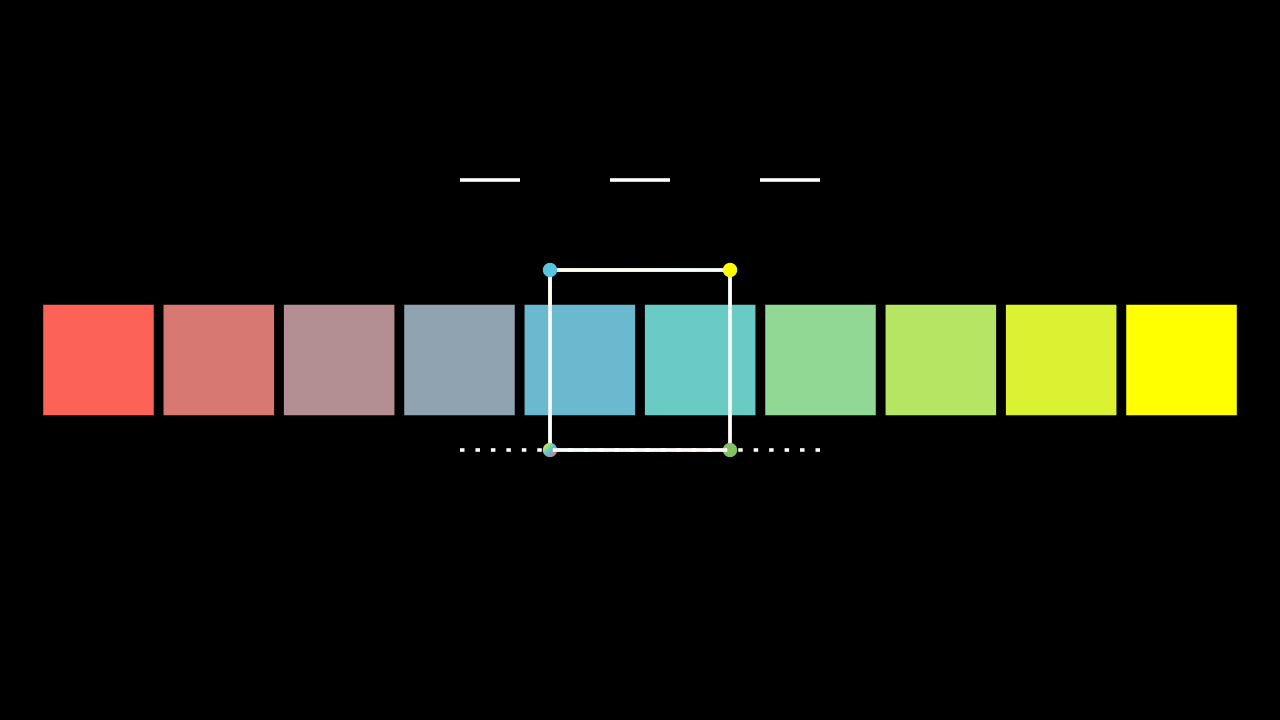

In [8]:
%%manim -qm TestGlsl

class TestGlsl(Scene):
    def construct(self):

        # square = Square(side_length=1)
        colors = [RED, BLUE, YELLOW]
        palette = color_gradient(colors, 10)
        grp = VGroup(*[
            Square(color=c, fill_opacity=1)
            for c in palette
        ]).arrange(RIGHT).set(width=config.frame_width-1)
        sq = Square(side_length=2).set_color_by_gradient(colors)
        self.add( sq,grp)

        my_square = Square(side_length=2)
        my_square.set_color_by_gradient(colors)
        my_square.set_sheen_direction(LEFT) # Sets the gradient to go from left to right
        # self.play(Create(my_square))

        square = Square() # Create a square

        # Get the coordinates of the corners
        DL = square.get_bottom() + square.get_left()
        DR = square.get_bottom() + square.get_right()
        UL = square.get_top() + square.get_left()
        UR = square.get_top() + square.get_right()

        # Create dots at the corners and color them
        bottom_left_dot = Dot(DL).set_color_by_gradient(colors)
        bottom_right_dot = Dot(DR, color=GREEN)
        upper_left_dot = Dot(UL, color=BLUE)
        upper_right_dot = Dot(UR, color=YELLOW)

        # Add everything to the scene
        self.add(square, bottom_left_dot, bottom_right_dot, upper_left_dot, upper_right_dot)

        dashed_1 = DashedLine(
            start=LEFT * 2,
            end=RIGHT * 2,
            dash_length=0.8  # Longer dashes
        ).shift(UP*2)

        # Create a dashed line with a smaller dash-to-space ratio
        dashed_2 = DashedLine(
            start=LEFT * 2,
            end=RIGHT * 2,
            dashed_ratio=0.3 # More space between dashes
        ).shift(DOWN)

        self.add(dashed_1, dashed_2)

In [16]:
import efinance as ef

ModuleNotFoundError: No module named 'efinance'

In [17]:

stock_code = '300414'
ef.stock.get_quote_history(stock_code)

# Export the specific day data to an Excel file
specific_day_data.to_excel('specific_day_stock_data.xlsx', index=False)

NameError: name 'ef' is not defined